In [1]:
# Libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../dados/interim/df_analises.csv")
df.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Ocupacao
0,5008804,1,1,1,0,0,2.0,427500.0,32.868574,12.435574,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro
1,5008805,1,1,1,0,0,2.0,427500.0,32.868574,12.435574,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro
2,5008806,1,1,0,0,0,2.0,112500.0,58.793815,3.104787,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Segurança
3,5008808,0,1,0,1,1,1.0,270000.0,52.321403,8.353354,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas
4,5008809,0,1,0,1,1,1.0,270000.0,52.321403,8.353354,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas


In [3]:
df_copia = df.copy()

In [4]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438463 entries, 0 to 438462
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Tem_carro              438463 non-null  int64  
 2   Tem_casa_propria       438463 non-null  int64  
 3   Tem_telefone_trabalho  438463 non-null  int64  
 4   Tem_telefone_fixo      438463 non-null  int64  
 5   Tem_email              438463 non-null  int64  
 6   Tamanho_familia        438463 non-null  float64
 7   Rendimento_anual       438463 non-null  float64
 8   Idade                  438463 non-null  float64
 9   Anos_empregado         438463 non-null  float64
 10  Categoria_de_renda     438463 non-null  object 
 11  Grau_escolaridade      438463 non-null  object 
 12  Estado_civil           438463 non-null  object 
 13  Moradia                438463 non-null  object 
 14  Ocupacao               438463 non-nu

In [5]:
# Gerando estatísticas básicas dos dados númericos
cols_df = ['Tamanho_familia', 'Rendimento_anual',
       'Idade', 'Anos_empregado']

df_copia[cols_df].describe().round(4)

,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado
count,438463.0000,4.384630e+05,438463.0000,438463.0000
mean,2.1945,1.875220e+05,43.8009,5.9484
std,0.8972,1.100832e+05,11.4583,6.5641
min,1.0000,2.610000e+04,20.5042,0.0000
25%,2.0000,1.215000e+05,34.2622,1.0158
50%,2.0000,1.611000e+05,42.7935,4.0192
75%,3.0000,2.250000e+05,53.3454,8.4957
max,20.0000,6.750000e+06,68.9980,47.9982


##### O dados tem um desvio padrão alto mostrando que os dados estão bem dispersos da média, mostrando que os dados podem variar muito da média causando assim outliers que podem nso atrapalhar na hora de treinar os meodelos de machine learning.

## Charts

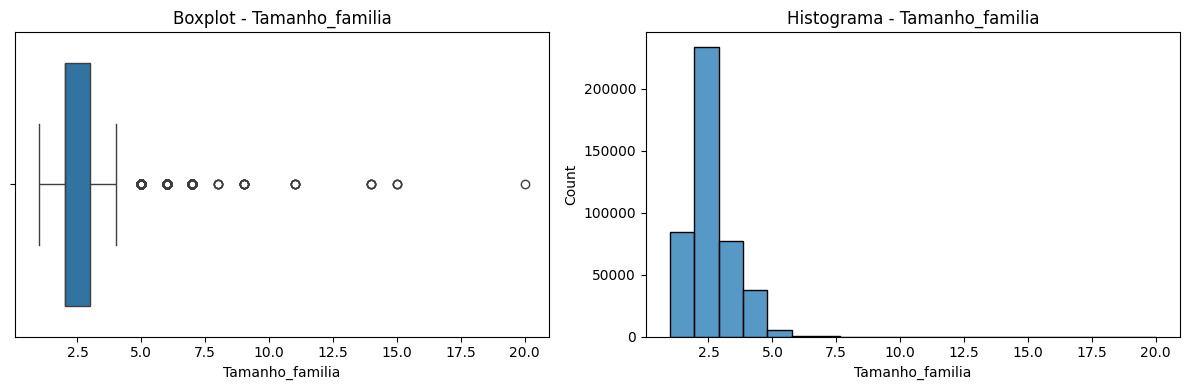

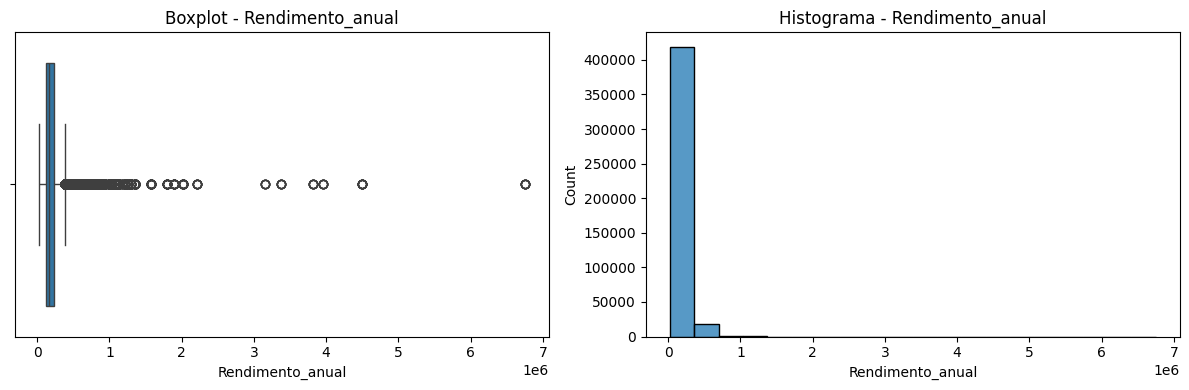

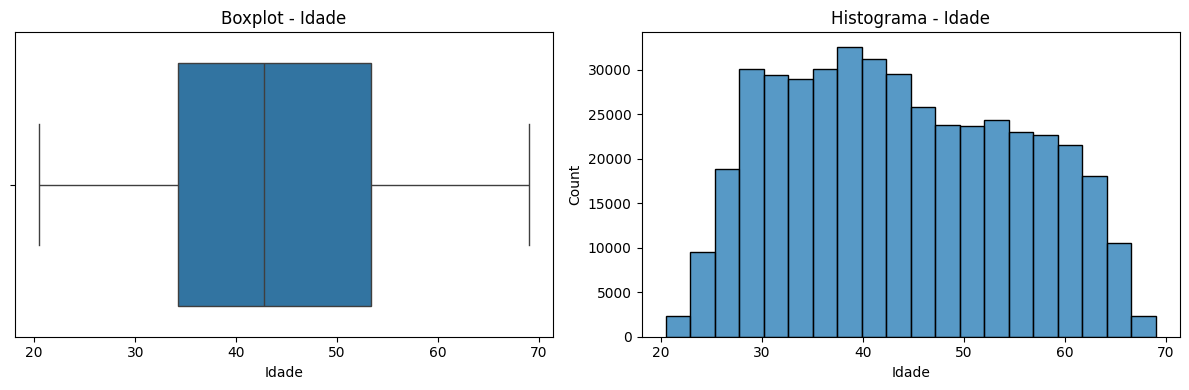

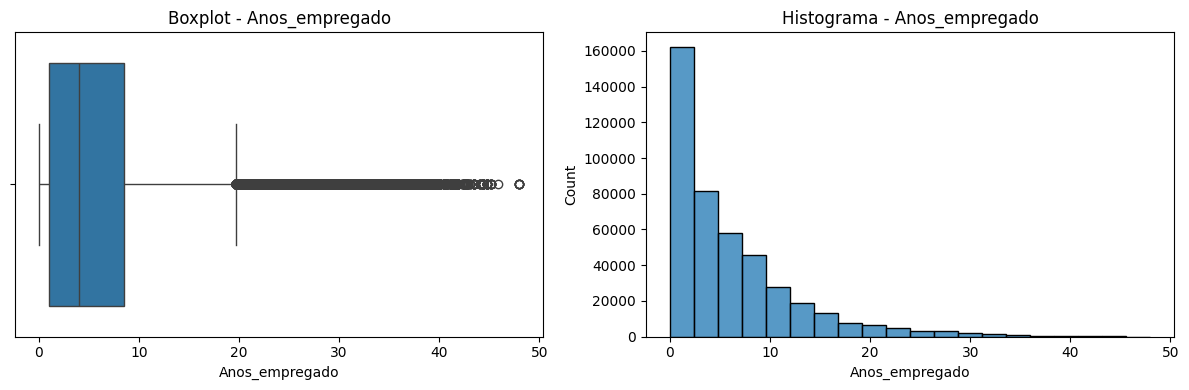

In [6]:
# gárfico boxplot e histograma.

for col in cols_df:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.boxplot(data=df_copia, x=col, ax=ax[0])
    ax[0].set_title(f'Boxplot - {col}')

    sns.histplot(data=df_copia, x=col, bins=20, ax=ax[1])
    ax[1].set_title(f'Histograma - {col}')

    plt.tight_layout()
    plt.show()

##### Os gráficos confirmam os outliers e como os dados estão com assimetria alta a esquerda.

In [7]:
'''Técnica para remoção de outliers a partir de um intervalo de confiança
o valor +- o desvio-padrão'''

coluna = df_copia['Rendimento_anual']

coluna_med = coluna.mean()
coluna_std = coluna.std()

limite_sup = coluna_med + (2 * coluna_std)
limite_inf = coluna_med - (2 * coluna_std)

index_outliers_ra = []

for index, valor in coluna.items(): 
  if valor > limite_sup or valor < limite_inf:
    index_outliers_ra.append(index)

len(index_outliers_ra)

12641

In [8]:
# Dropando outliers dos dados do rendimento anual
df_clientes_cadastrados_s_outliers_ra = df_copia.drop(index_outliers_ra)
df_clientes_cadastrados_s_outliers_ra.shape

(425822, 15)

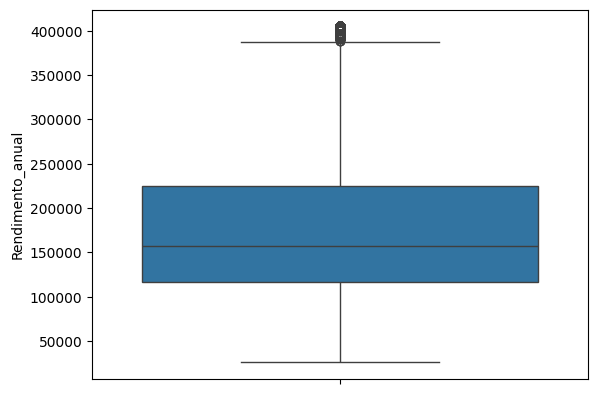

In [9]:
# Plota gráfico de boxplot
sns.boxplot(data=df_clientes_cadastrados_s_outliers_ra, y='Rendimento_anual') 
plt.xticks(rotation=45)
plt.show()

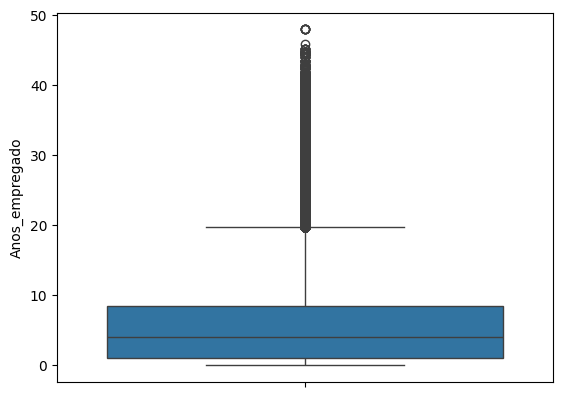

In [10]:
# Plota gráfico de boxplot
sns.boxplot(data=df_copia, y='Anos_empregado') 
plt.xticks(rotation=45)
plt.show()

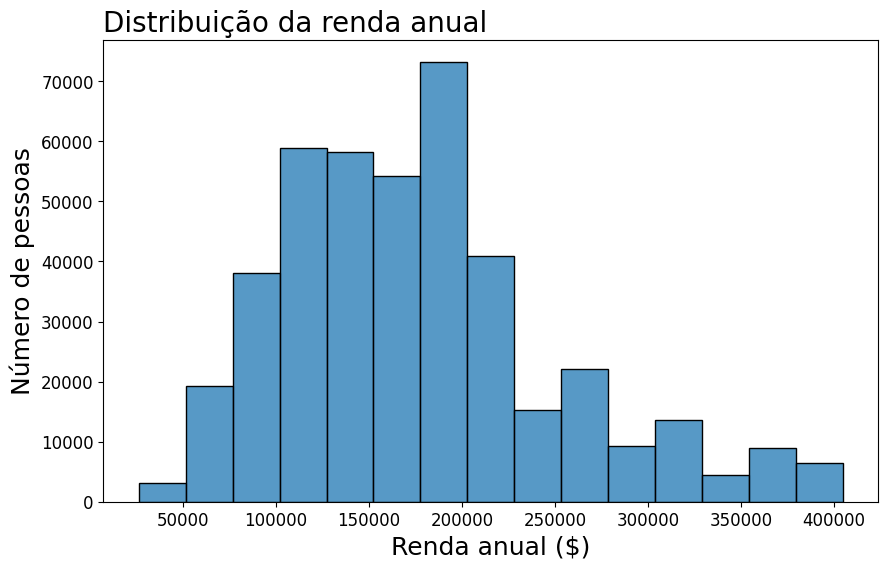

In [11]:
# Plota gráfico histograma

fig = plt.figure(figsize=(10,6))
ax = sns.histplot(data=df_clientes_cadastrados_s_outliers_ra, x='Rendimento_anual', bins=15)
plt.xticks(rotation=360)
ax.set_title('Distribuição da renda anual', fontsize = 20, loc='left')
ax.set_ylabel('Número de pessoas', fontsize = 18)
ax.set_xlabel('Renda anual ($)', fontsize = 18)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
plt.show()

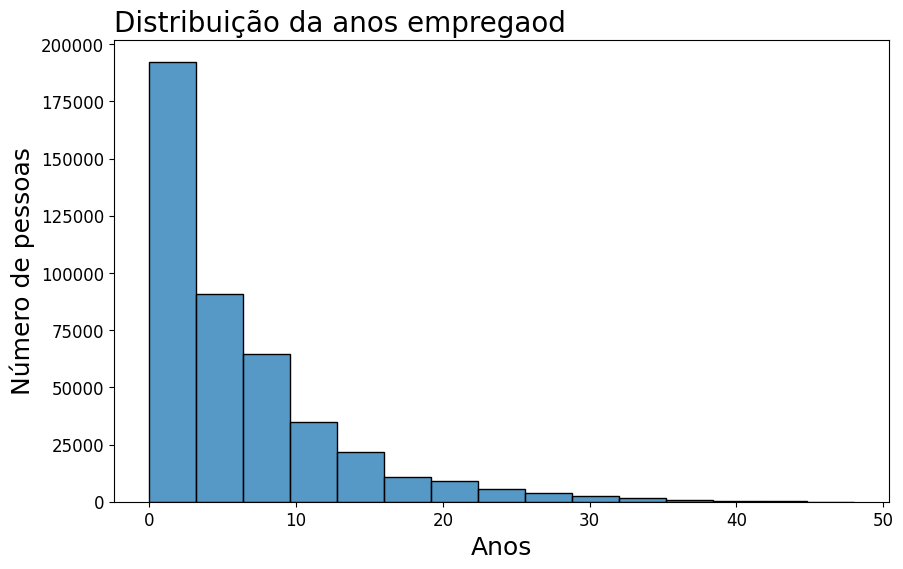

In [ ]:
# Plota gráfico histograma

fig = plt.figure(figsize=(10,6))
ax = sns.histplot(data=df_copia, x='Anos_empregado', bins=15)
plt.xticks(rotation=360)
ax.set_title('Distribuição da anos empregado', fontsize = 20, loc='left')
ax.set_ylabel('Número de pessoas', fontsize = 18)
ax.set_xlabel('Anos', fontsize = 18)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
plt.show()

In [13]:
# Salva dados de clientes aprovados.
df_copia.to_csv("../dados/processed/df_clientes_cadastrados_processado.csv", index=False)